# Kontinuerlige fordelinger

I forrige kapittel så vi på hvordan Scipy kunne hjelpe oss med diskrete fordelinger. Den samme pakken inneholder også tilsvarende funksjonalitet for [kontinuerlige sannsynlighetsfordelinger](https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html#continuous-distributions). Vi skal se på noen av dem her.

## Normalfordelingen
Da vi så på diskrete fordelinger brukte vi PDF-funksjonen for å finne sannsynligheter for de diskrete verdiene. Med kontinuerlige fordelinger, er ikke dette noen god løsning. Sannsynligheten for enhver verdi i en kontinuerlig fordelinger 0, og det vi egentlig er ute etter, er arealet under grafen som fordelingen danner. For å slippe integrasjon, bruker vi derfor den kumulative funksjonen, CDF (Cumulative Distribution Function).

#### Eksempel:
Finn $\Phi(1.23)$


In [1]:
from scipy.stats import norm

norm.cdf(1.23)

0.89065144757430814

#### Eksempel:

Gitt $X \tilde {} N_{(3, 2)}$

Hva er sannsynligheten for at X er mindre enn 3.82?

In [2]:
norm.cdf(3.82, 3, 2)

0.65909702622767741

CDF finner arealet under grafen fra $-\inf$ og opp til X (første parameter, altså 3.82 i forrige eksempel). Hvis vi vil finne sannsynligheten for at verdien faller innenfor et intervall, regner vi ut for begge ender av intervallet, og trekker fra.

#### Eksempel
Gitt $X \tilde {} N_{(1.5, 1.75)}$

Hva er sannsynligheten for at X er mellom 1 og 2?

In [3]:
a = 1
b = 2

norm.cdf(b, 1.5, 1.75) - norm.cdf(a, 1.5, 1.75)

0.22490303780401533

Her ser du at vi gjentar $\sigma$ og $\mu$ i begge uttrykkene. Hvis vi har en fordeling vi ønsker å bruke flere ganger, kan vi lagre denne i en variabel. Vi lager da $N_{(\sigma, \mu)}$ ved at vi spesifiserer disse to direkte til "norm", og får en fordeling som vi kan ta vare på. Deretter trenger vi kun legge inn X i CDF-funksjonen. Dette kan spare oss for litt skriving:

In [4]:
min_fordeling = norm(1.5, 1.75)

min_fordeling.cdf(b) - min_fordeling.cdf(a)

0.22490303780401533

### Invers kumulativ fordeling

Invers er tilgjengelig ved hjelp av PPF-funksjonen (Percent Point Function). Denne kan vi bruke direkte på "norm", som vi har gjort med CDF og PDF tidligere. Vi kan også bruke den på våre egne varianter av fordelingene, slik som "min_fordeling" over. Prøv å bytte ut "norm" med "min_fordeling", her:

In [5]:
norm.ppf(0.05)

-1.6448536269514729

### Normaltilnærmingen

Normaltilnærming for både diskrete og kontinuerlige stokastiske variable kan vi finne ved å bruke de samme funksjonene som tidligere, og setter inn hhv. $\mu=\mu x - \frac{1}{2}$ og $\sigma=\sigma x$, eller $\mu=\mu x$ og $\sigma = \sigma x$ slik vi er vant med.

#### Eksempel

In [6]:
u = 4.7
sigma = 2.8
a = 3
b = 6

# Diskret
ford_d = norm(u-0.5, sigma) # Vi trekker fra 1/2 her.
print(ford_d.cdf(b) - ford_d.cdf(a))

# Kontinuerlig
ford_k = norm(u, sigma)
print(ford_k.cdf(b) - ford_k.cdf(a))

0.405724028849
0.406900415875


### Graf
De fleste kjenner igjen normalfordelingskurven når de ser den. Men la oss tegne en graf likevel. Vi importerer matplotlib og DataFrame fra Pandas, slik vi har gjort før. Vi importerer også numpy, som forkortelsen np. Deretter bruker vi numpy sin "linspace" for å lage en jevnt fordelt liste med tall fra -4 til 4 på 50 elementer. Vi kunne også brukt "range"-funksjonen som vi har sett før, men da måtte vi selv funnet mellomrommet mellom hver verdi. Linspace tar inn parametere for miste verdi, største verdi, og antall oppdelinger.

Videre lager vi en dataframe, og bruker normalfordelingens PDF-funksjon på elementene i x. For å få riktige indekser på X-aksen spesifiserer vi at vi ønsker x som "index"-parameter i DataFramen vår. Til slutt plotter vi den med "line"-plotteren.

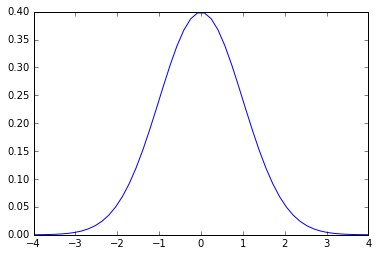

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np

x = np.linspace(-4, 4, 50) # Finn 50 jevnt fordelte verdier mellom -4 og 4.
df = DataFrame(norm.pdf(x), index=x) # For hver verdi i x, regn ut tilhørende PDF-verdi,
# og bruk x som indekser på X-aksen.

df.plot.line(legend=None)
plt.show()

Linjen følger altså PDF til X-verdiene. Tilsvarende kumulative funksjon (CDF) vil gi oss arealet under grafen fra $-\inf$ til parameteren x.

In [8]:
print('PDF(1):', norm.pdf(1))
print('CDF(1):', norm.cdf(1))

PDF(1): 0.241970724519
CDF(1): 0.841344746069


Nå kan vi lage en tilsvarende figur for den kumulative varianten. Siden vi allerede har laget x-variabelen, og importert de funksjonene vi trenger, gjenbruker vi dette, og koden blir mye kortere:

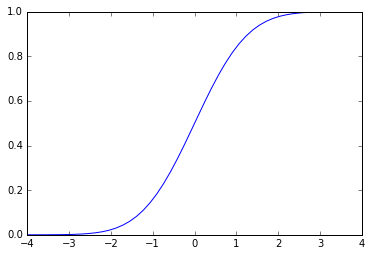

In [9]:
df2 = DataFrame(norm.cdf(x), x) # Gjenbruker x-ene mellom -4 og 4, og bruker disse til å finne tilhørende CDF
# (kumulativ)

df2.plot.line(legend=None)
plt.show()

Siden denne allerede plotter den kumulative varianten, har vi her CDF(x) for hver x-verdi, og vi tenker ikke lenger på arealet under grafen.

## Student's T
Scipy inneholder også kode for Student's T-fordelingen. En ting som er verdt å merke seg her er at parameterrekkefølgen ikke er slik den står i læreboka for $t_{\nu, \alpha}$. I Scipy er første parameter x / $\alpha$, og andre parameter df / $\nu$ (Degree of freedom, frihetsgrad).

For klarhetens skyld, kan vi skrive det slik:

In [10]:
from scipy.stats import t

x = 0.2
df = 3

t.ppf(x, df)

-0.97847231182829941

Merk at vi kan spesifisere $\mu$ og $\sigma$ også, men disse kommer etter frihetsgraden. Ta gjerne en kikk i [dokumentasjonen til Scipy](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.t.html#scipy.stats.t) for en full oversikt.

#### Eksempel
Gitt $X \tilde {} St_{(5, 2, 9)}$

Finn $x$ slik at $P(X \leq x) = 0.92$

In [11]:
x = 0.92
df = 9
mu = 5
sigma = 2

t.ppf(x, df, mu, sigma)

8.0630549309703579

### Graf
Vi tegner opp en graf for T-fordelingen også. Som eksempel kan vi ta $\nu=6, \mu=1.5, \sigma=2.5$. Koden er ganske lik det vi hadde for normalfordelingen, bare at t-fordelingen tar inn noen andre parametere.

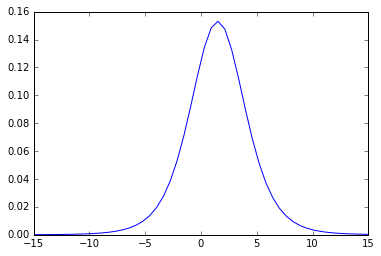

In [12]:
x = np.linspace(-15, 15, 50)

min_st = t(6, 1.5, 2.5) # Lager fordeling med våre "innstillinger",
# så vi kan bruke min_st.pdf(x) uten å ta med alle parameterne under.

df = DataFrame(min_st.pdf(x), index=x)

df.plot.line(legend=None)
plt.show()

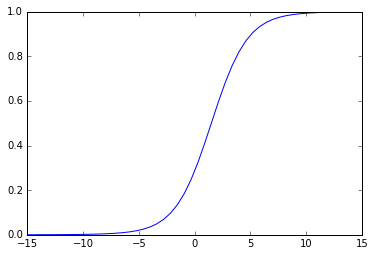

In [13]:
# Tilsvarende for kumulativ graf. Eneste forskjell fra den over er "cdf" istf. "pdf".
df2 = DataFrame(min_st.cdf(x), index=x)

df2.plot.line(legend=None)
plt.show()

## $\beta$-fordelingen
Vi kunne gjentatt mye av det vi har gjort over, også for $\beta$-fordelingen, men det meste fungerer på samme måte, bare med ulike parametere. Derfor kan vi ta en kikk på noe av det andre vi kan hente ut.

Importer, og lag en betafordeling. Bruk så funksjoner som var (varians), mean (forventning), eller [noen av de andre funksjonene](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.beta.html) vi har tilgjengelig.

Varians: 0.0198412698413
Forventning: 0.166666666667
P(X<0.3): 0.83193


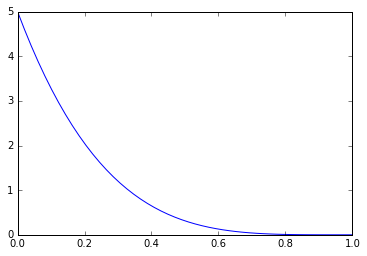

In [14]:
from scipy.stats import beta

min_beta = beta(1,5) # Lager en betafordeling med a=1, b=5.

print('Varians:', min_beta.var())
print('Forventning:', min_beta.mean())
print('P(X<0.3):', min_beta.cdf(0.3))

# Tegner også en graf over PDF så man får et visuelt inntrykk av hva verdiene over betyr.
x = np.linspace(0, 1, 50)
df3 = DataFrame(min_beta.pdf(x), index=x)

df3.plot.line(legend=None)
plt.show()

## Eksponentialfordelingen
Eksponentialfordelingen brukes på en litt annen måte fra Scipy enn formlene fra læreboka. Istedenfor å regne ut en $\lambda$, bruker vi forventningen direkte som "scale"-parameter. Se eksempelet under.

#### Eksempel:
Du jobber i en havnekiosk, om sommeren, og selger softis. Du har regnet ut at det går i gjennomsnitt 8 minutter mellom hver gang du selger en softis. Ventettiden er eksponentielt fordelt. Hva er sannsynligheten for at du får solgt en softis innen 20 minutter?

Her lager vi en eksponentialfordeling med forventning / gjennomsnittlig tid mellom salg / scale lik 8. Videre kan vi bruke denne direkte med den kumulative CDF-funksjonen, og sette inn 20 som eneste parameter.

In [15]:
from scipy.stats import expon

exp_ventetid = expon(scale=8)

exp_ventetid.cdf(20)

0.91791500137610116

Sannsynligheten er altså 91.8% for at du får solgt en softis innen 20 minutter.

Vi kan også tegne PDF-funksjonen. Vi ser, som forventet, at vi sannsynligvis kommer til å selge vår neste softis om ikke så alt for lenge.

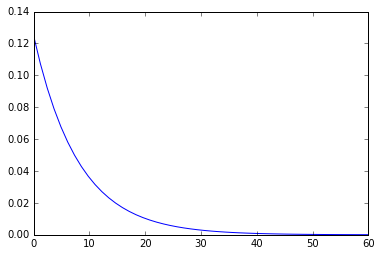

In [16]:
x = np.linspace(0, 60, 50)
df3 = DataFrame(exp_ventetid.pdf(x), index=x)

df3.plot.line(legend=None)
plt.show()